<a href="https://colab.research.google.com/github/teddcp/Machine-Learning-/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Introduction
K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well −

      Lazy learning algorithm − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.

      Non-parametric learning algorithm − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.

### 2. Working of KNN Algorithm
K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set. We can understand its working with the help of following steps −

    Step 1 − For implementing any algorithm, we need dataset. So during the first step of KNN, we must load the training as well as test data.

    Step 2 − Next, we need to choose the value of K i.e. the nearest data points. K can be any integer.

    Step 3 − For each point in the test data do the following −

        3.1 − Calculate the distance between test data and each row of training data with the help of any of the method namely: Euclidean, Manhattan or Hamming distance. The most commonly used method to calculate distance is Euclidean.

        3.2 − Now, based on the distance value, sort them in ascending order.

        3.3 − Next, it will choose the top K rows from the sorted array.

        3.4 − Now, it will assign a class to the test point based on most frequent class of these rows.

    Step 4 − End

[more](https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_knn_algorithm_finding_nearest_neighbors.htm)

[KNN](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)

# K- Nearest Neighbour Algorithm
------------------------------------------

fit vs transform vs fit_transform 

https://datascience.stackexchange.com/q/12321/94070
https://stackoverflow.com/q/23838056/12210002
https://www.kaggle.com/questions-and-answers/58368


## 1. Importing the libraries


In [0]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2. Getting the data

In [0]:
data=pd.read_csv('/content/Classified Data',index_col=0)

In [7]:
data.head(10)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


In [8]:
data.info() #no null vlaues are there

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [9]:
# check if null vlaues are there 
data.isna().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [12]:
#renaming the target class as target_class
data.rename(columns={'TARGET CLASS':'target_class'},inplace=True)
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,target_class
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## 3. Standardizing the data : necessary step for KNN 

1. We require to standardize the data else while calculating the euclidean distace, there will be disrutions or high differences which might affect the analysis. 

2. We can use the z-score method(standard Sclaler) or min-max Sclaler. We should not use the min-max scaler as it gets affected by outliers easily.

3. Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. 

4. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler=StandardScaler()

In [18]:
new_data=pd.DataFrame(scaler.fit_transform(data.drop('target_class',axis=1)), columns=data.columns[:-1])
new_data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## 4. preparing data for training and testing

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
y=data.loc[:,'target_class']
x_train,x_test,y_train,y_test=train_test_split(new_data,y,test_size=0.3,random_state=42,stratify=y)

## 5. using KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn=KNeighborsClassifier(n_neighbors=5)

In [24]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred=knn.predict(x_test)

In [26]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

## 6. Evaluating the Accuracy 

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [28]:
#confusion Matrix
confusion_matrix(y_pred,y_test)

array([[138,  17],
       [ 12, 133]])

In [29]:
# Accuracy Score
accuracy_score(y_test,y_pred)

0.9033333333333333

In [31]:
# classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       150
           1       0.92      0.89      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



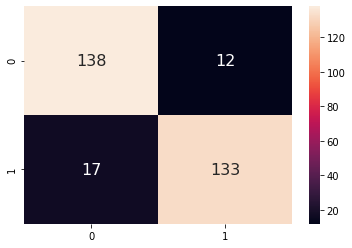

In [39]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f',annot_kws={'size':16})

## Note

As you can see with a random k value (above 5 is taken), we are achieving the accuracy of 90%. But that won't hold True for all the time. Hence we need to hypertune the parameter K to get a higher accouracy.

**Solution** : Cross_validation

In [0]:
from sklearn.model_selection import cross_val_score

In [42]:
#taking k =5 for KNN and calculating the scores for 10-fold cross validation

knn2=KNeighborsClassifier(n_neighbors=5)

#doing 10-fold cross validation
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many

scores=cross_val_score(knn2,new_data,y,cv=10,scoring='accuracy')
print(scores)
print(scores.mean())

[0.93 0.95 0.91 0.94 0.87 0.92 0.94 0.92 0.97 0.94]
0.9289999999999999


In [59]:
#in the previous example we hv taken the k value as 5 for KNN 
#Now its time to recursively take k values and store the mean accuracy score
#then get the highest one


# range of k we want to try
k_range = range(1, 61)

# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:

    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
  
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, new_data, y, cv=10, scoring='accuracy')
  
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


k_np_scores=np.array(k_scores)
print(k_np_scores.max(),k_np_scores.argmax())


0.944 45


In [60]:
k_np_scores[k_np_scores>0.94]

array([0.941, 0.943, 0.94 , 0.943, 0.941, 0.942, 0.943, 0.942, 0.943,
       0.942, 0.944, 0.941, 0.944, 0.942, 0.944, 0.94 , 0.942, 0.942,
       0.943, 0.942, 0.942, 0.94 , 0.94 , 0.94 ])

Text(0.5, 1.0, 'Determining K for KNN')

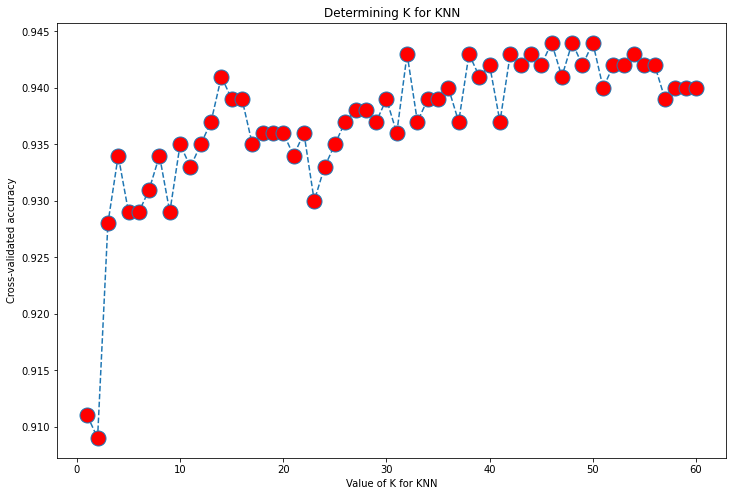

In [61]:
#### 
##PLOTTING
####

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)

plt.figure(figsize=(12,8))
plt.plot(k_range, k_scores,marker='o',markerfacecolor='red', markersize=15,linestyle='dashed',)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.title('Determining K for KNN')

0.92


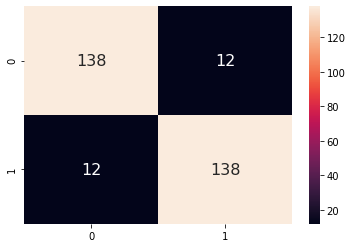

In [66]:
## From the above graph, we conclude that, 46 is the best k value for KNN

knn=KNeighborsClassifier(n_neighbors=46)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.0f',annot_kws={'size':16})
print(accuracy_score(y_pred,y_test))

**we got an accuracy of 92%**

[Cross validation1](https://www.ritchieng.com/machine-learning-cross-validation/) and [cross validation 2](https://medium.com/@svanillasun/how-to-deal-with-cross-validation-based-on-knn-algorithm-compute-auc-based-on-naive-bayes-ff4b8284cff4)

[GRID SEARCH](https://mmuratarat.github.io/2019-07-12/k-nn-from-scratch)

[Both](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/)

[meaning](https://datascience.stackexchange.com/q/21877/94070) of grid search

## Doing Grid Search instead of Cross Validation

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
knn3=KNeighborsClassifier()

In [94]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 101)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn3, param_grid, cv=5,scoring='accuracy',n_jobs=-1)
#fit model to data
knn_gscv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  

In [95]:
knn_gscv.best_params_

{'n_neighbors': 39}

In [96]:
# accuracy score
knn_gscv.best_score_

0.9542857142857143

In [0]:
y_pred=knn_gscv.predict(x_test)

0.92


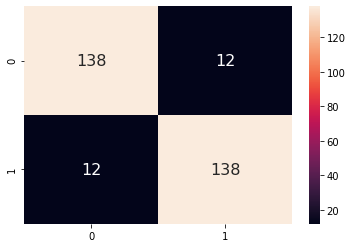

In [98]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.0f',annot_kws={'size':16})
print(accuracy_score(y_pred,y_test))

## for Classified data set
-------------------------------

we have got the accuracy of **92%** by both cross validation and grid-search CV

## KNN Regression
-----------------------

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

https://www.antoniomallia.it/on-implementing-k-nearest-neighbor-for-regression-in-python.html






#######################################################################

#Now doing on IRIS set 
----------------------------

In [118]:
data=pd.read_csv('/content/Iris.csv')
data.head(100)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [124]:
#converting categorical varibale to numerical
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()

y = labelencoder_y.fit_transform(data['Species'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [125]:
x=data.drop(['Species'],axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [127]:
x.isna().sum() #no null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

## Scaling the data

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [130]:
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## preparing the data for training and testing

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

# Applying knn for k=5

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [135]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred=knn.predict(x_test)

Checking the Accuracy

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

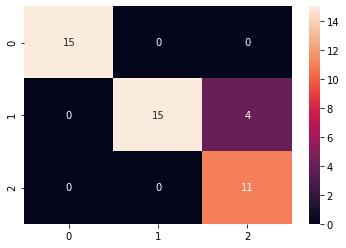

In [139]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.0f')

In [140]:
accuracy_score(y_pred,y_test)

0.9111111111111111

In [142]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.79      0.88        19
           2       0.73      1.00      0.85        11

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



## Now applying k-fold cross validation


In [171]:
from sklearn.model_selection import cross_val_score

k_range=np.arange(1,71)
res=[]

for i in k_range:
  knn=KNeighborsClassifier(n_neighbors=i)
  scores=cross_val_score(knn,x,y,scoring='accuracy',cv=10,n_jobs=-1)
  res.append(scores.mean())

k_np_scores=np.array(res)
print(k_np_scores.max(),k_np_scores.argmax())


0.9666666666666668 7


In [172]:
print(k_np_scores)

[0.95333333 0.95333333 0.95333333 0.94666667 0.95333333 0.96666667
 0.95333333 0.96666667 0.95333333 0.96       0.94666667 0.94666667
 0.95333333 0.96       0.96       0.96666667 0.94666667 0.95333333
 0.94       0.94666667 0.94       0.95333333 0.94666667 0.94666667
 0.94666667 0.94666667 0.94666667 0.94666667 0.94666667 0.94
 0.94666667 0.94       0.93333333 0.91333333 0.91333333 0.9
 0.90666667 0.9        0.9        0.88666667 0.89333333 0.89333333
 0.89333333 0.88666667 0.89333333 0.88       0.88       0.88
 0.87333333 0.86666667 0.87333333 0.86666667 0.86666667 0.86666667
 0.86       0.87333333 0.86666667 0.87333333 0.87333333 0.88
 0.86666667 0.87333333 0.87333333 0.86666667 0.85333333 0.86
 0.85333333 0.84666667 0.85333333 0.84666667]


In [173]:
list(enumerate(k_np_scores[k_np_scores>0.96]))

[(0, 0.9666666666666666), (1, 0.9666666666666668), (2, 0.9666666666666666)]

Text(0.5, 1.0, '\n|| IRIS Data Set ||  Determining K for KNN')

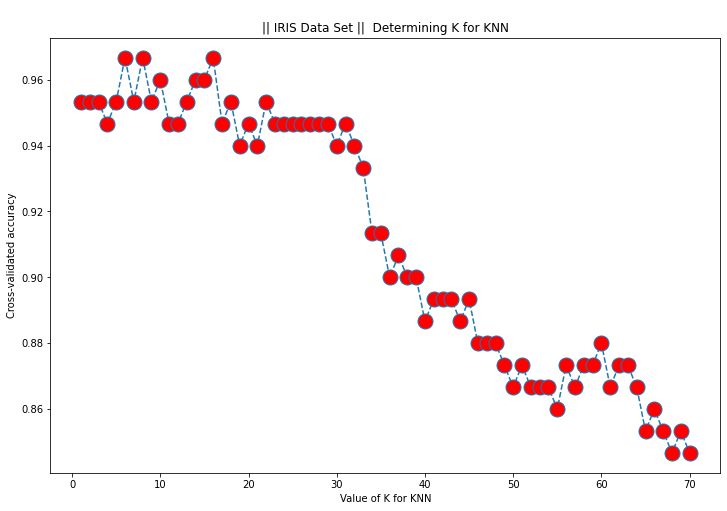

In [174]:
#### 
##PLOTTING
####

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)

plt.figure(figsize=(12,8))
plt.plot(k_range, k_np_scores,marker='o',markerfacecolor='red', markersize=15,linestyle='dashed',)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.title('\n|| IRIS Data Set ||  Determining K for KNN')

0.9333333333333333


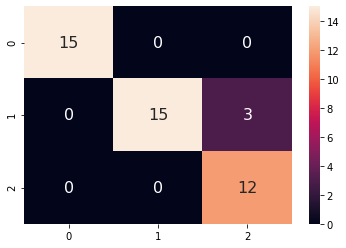

In [177]:
## From the above graph, we conclude that, 16 is the best k value for KNN

knn=KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.0f',annot_kws={'size':16})
print(accuracy_score(y_pred,y_test))

with k-fold cross validation we have got k=6 and accuracy is **93%**

## Now doing Grid Search
------------------------------------

In [0]:
from sklearn.model_selection import GridSearchCV

In [166]:
knn=KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 71)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5,scoring='accuracy',n_jobs=-1)
#fit model to data
knn_gscv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [167]:
knn_gscv.best_params_,knn_gscv.best_score_

({'n_neighbors': 14}, 0.9714285714285715)

In [0]:
# predicting
y_pred=knn_gscv.predict(x_test)

0.9555555555555556


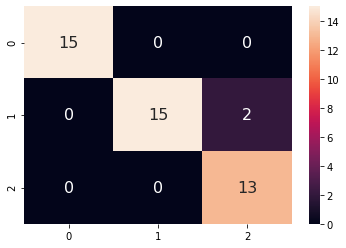

In [170]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.0f',annot_kws={'size':16})
print(accuracy_score(y_pred,y_test))

## Now For IRIS Data set
-------------------------------------------------

1. with k-fold Cross Validation we have got : 93% accuracy
2. with GridSearchCV, accuracy is 95%